In [1]:
# 导入包
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import fix_yahoo_finance as fyf
fyf.pdr_override()

In [2]:
'''
获取国内股票数据的方式是：“股票代码”+“对应股市”（港股为.hk，A股为.ss）
例如腾讯是港股：0700.hk
'''
# 字典：6家公司的股票映射
gafataDict = {'谷歌':'GOOG', '亚马逊':'AMZN', 'Facebook':'FB',
              '苹果':'AAPL', '阿里巴巴':'BABA', '腾讯':'0700.hk'}

In [3]:
'''
定义函数
函数功能：计算股票涨跌幅 =（现在股价 - 买入价格）/ 买入价格
输入参数：column是收盘价这一列的数据
返回数据：股票涨跌幅
'''
def change(column):
    # 买入价格
    buyPrice = column[0]
    # 现在股价
    # column.size是总共数据条数，序号是从0开始的，所以最后一条数据的序号是总数目-1
    curPrice = column[column.size - 1]
    # 累计涨跌幅
    priceChange = (curPrice - buyPrice) / buyPrice
    # 判断股票是上涨，还是下跌
    if(priceChange > 0):
        print('股票累计上涨：', priceChange * 100, '%')
    elif(priceChange < 0):
        print('股票累计下跌：', priceChange * 100, '%')
    else:
        print('股票价格没有变化：', priceChange * 100, '%')
    # 返回数据
    return priceChange

# 阿里巴巴

In [4]:
# 获取哪段时间范围的股票数据
start_date = '2017-01-01'
end_date = '2018-06-15'

# 从雅虎财经数据源（get_data_yahoo）获取阿里巴巴股票数据
babaDf = pdr.get_data_yahoo(gafataDict['阿里巴巴'], start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [5]:
'''
每日股票价位信息
Open:开盘价
High:最高价
Low：最低价
Close：收盘价
Volume：成交量
下面我们主要关注每日的收盘价
'''
# 查看前5行数据
babaDf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,89.000000,89.000000,88.080002,88.599998,88.599998,8789400
2017-01-04,88.985001,90.889999,88.580002,90.510002,90.510002,11490200
2017-01-05,91.910004,94.809998,91.639999,94.370003,94.370003,16821500
2017-01-06,94.400002,94.500000,93.000000,93.889999,93.889999,7639800
2017-01-09,94.160004,95.650002,93.309998,94.720001,94.720001,10792900


In [6]:
# 股票数据的行索引是时间序列类型，记录每天的股票信息
babaDf.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2018-06-01', '2018-06-04', '2018-06-05', '2018-06-06',
               '2018-06-07', '2018-06-08', '2018-06-11', '2018-06-12',
               '2018-06-13', '2018-06-14'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [7]:
# 查看数据集情况
babaDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-03 to 2018-06-14
Data columns (total 6 columns):
Open         365 non-null float64
High         365 non-null float64
Low          365 non-null float64
Close        365 non-null float64
Adj Close    365 non-null float64
Volume       365 non-null int32
dtypes: float64(5), int32(1)
memory usage: 18.5 KB


In [8]:
# 查看每一列数据类型
babaDf.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int32
dtype: object

In [9]:
# 查看数据集描述统计信息
babaDf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02
mean,156.522682,158.188468,154.580252,156.441287,156.441287,1.665598e+07
std,34.782544,35.281792,34.182853,34.700980,34.700980,8.995131e+06
min,88.985001,89.000000,88.080002,88.599998,88.599998,4.120700e+06
25%,120.160004,121.489998,119.510002,120.720001,120.720001,1.078770e+07
50%,172.009995,173.529999,169.639999,171.750000,171.750000,1.482670e+07
75%,184.070007,185.845001,181.149994,183.830002,183.830002,1.975560e+07
max,209.949997,211.699997,207.509995,210.860001,210.860001,8.093690e+07


In [10]:
'''
计算股票涨跌幅
'''
# 获取收盘价Close这一列的数据
closeCol = babaDf['Close']
# 调用函数，获取涨跌幅
babaChange = change(closeCol)

股票累计上涨： 137.9909771555525 %


---

# 谷歌

In [11]:
# 获取谷歌股票数据
googDf = pdr.get_data_yahoo(gafataDict['谷歌'], start_date, end_date)

googDf.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,778.809998,789.630005,775.799988,786.140015,786.140015,1657300
2017-01-04,788.359985,791.340027,783.159973,786.900024,786.900024,1073000
2017-01-05,786.080017,794.479980,785.020020,794.020020,794.020020,1335200
2017-01-06,795.260010,807.900024,792.203979,806.150024,806.150024,1640200
2017-01-09,806.400024,809.966003,802.830017,806.650024,806.650024,1272400


In [12]:
'''
计算股票涨跌幅
'''
# 获取收盘价Close这一列的数据
closeCol = googDf['Close']
# 调用函数，获取涨跌幅
googChange = change(closeCol)

股票累计上涨： 46.55404546478911 %


---

# 亚马逊

In [13]:
# 获取亚马逊股票数据
amznDf = pdr.get_data_yahoo(gafataDict['亚马逊'], start_date, end_date)

amznDf.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,757.919983,758.760010,747.700012,753.669983,753.669983,3521100
2017-01-04,758.390015,759.679993,754.200012,757.179993,757.179993,2510500
2017-01-05,761.549988,782.400024,760.260010,780.450012,780.450012,5830100
2017-01-06,782.359985,799.440002,778.479980,795.989990,795.989990,5986200
2017-01-09,798.000000,801.770020,791.770020,796.919983,796.919983,3440100


In [14]:
'''
计算股票涨跌幅
'''
# 获取收盘价Close这一列的数据
closeCol = amznDf['Close']
# 调用函数，获取涨跌幅
amznChange = change(closeCol)

股票累计上涨： 128.72875713294795 %


---

# Facebook

In [15]:
# 获取Facebook股票数据
fbDf = pdr.get_data_yahoo(gafataDict['Facebook'], start_date, end_date)

fbDf.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,116.029999,117.839996,115.510002,116.860001,116.860001,20663900
2017-01-04,117.550003,119.660004,117.290001,118.690002,118.690002,19630900
2017-01-05,118.860001,120.949997,118.320000,120.669998,120.669998,19492200
2017-01-06,120.980003,123.879997,120.029999,123.410004,123.410004,28545300
2017-01-09,123.550003,125.430000,123.040001,124.900002,124.900002,22861600


In [16]:
'''
计算股票涨跌幅
'''
# 获取收盘价Close这一列的数据
closeCol = fbDf['Close']
# 调用函数，获取涨跌幅
fbChange = change(closeCol)

股票累计上涨： 68.41519451980838 %


---

# 苹果

In [17]:
# 获取苹果股票数据
aaplDf = pdr.get_data_yahoo(gafataDict['苹果'], start_date, end_date)

aaplDf.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,115.800003,116.330002,114.760002,116.150002,113.410263,28781900
2017-01-04,115.849998,116.510002,115.750000,116.019997,113.283333,21118100
2017-01-05,115.919998,116.860001,115.809998,116.610001,113.859421,22193600
2017-01-06,116.779999,118.160004,116.470001,117.910004,115.128761,31751900
2017-01-09,117.949997,119.430000,117.940002,118.989998,116.183273,33561900


In [18]:
'''
累计涨幅
'''
# 获取收盘价Close这一列的数据
closeCol = aaplDf['Close']
# 调用函数，获取涨跌幅
aaplChange = change(closeCol)

股票累计上涨： 64.27033983176341 %


---

# 腾讯

In [20]:
# 获取腾讯股票数据
txDf = pdr.get_data_yahoo(gafataDict['腾讯'], start_date, end_date)

txDf.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,188.000000,191.100006,188.000000,189.399994,188.557770,9637272
2017-01-04,190.399994,190.500000,188.100006,189.000000,188.159561,11411490
2017-01-05,191.000000,194.199997,190.699997,193.300003,192.440445,20543005
2017-01-06,196.199997,196.800003,194.699997,195.100006,194.232437,20077760
2017-01-09,196.699997,196.899994,195.199997,195.600006,194.730209,13605277


In [21]:
# 腾讯是港股，所以这里的收盘价是港币，按照今天的汇率将其转化为美元
exchange = 0.1275  # 港币兑换美元的汇率，这个值可以在网上查到当天的最新汇率
# 为了方便后期多家公司的股价比较，增加新的一列收盘价（美元）
txDf['Close_dollar'] = txDf['Close'] * exchange

txDf.head()

,Open,High,Low,Close,Adj Close,Volume,Close_dollar
Date,,,,,,,
2017-01-03,188.000000,191.100006,188.000000,189.399994,188.557770,9637272,24.148499
2017-01-04,190.399994,190.500000,188.100006,189.000000,188.159561,11411490,24.097500
2017-01-05,191.000000,194.199997,190.699997,193.300003,192.440445,20543005,24.645750
2017-01-06,196.199997,196.800003,194.699997,195.100006,194.232437,20077760,24.875251
2017-01-09,196.699997,196.899994,195.199997,195.600006,194.730209,13605277,24.939001


In [22]:
'''
计算股票涨跌幅
'''
# 获取收盘价Close这一列的数据
closeCol = txDf['Close']
# 调用函数，获取涨跌幅
txChange = change(closeCol)

股票累计上涨： 116.47307971931615 %


---

# 数据可视化

In [19]:
%matplotlib inline

## 折线图：GAFATA股价走势比较

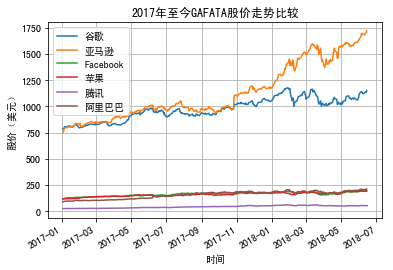

In [23]:
# 绘制谷歌的画纸1
ax1 = googDf.plot(x=googDf.index, y='Close', label='谷歌')
# 通过指定画纸ax，在同一张画纸上绘图
# 亚马逊
amznDf.plot(ax=ax1, x=amznDf.index, y='Close', label='亚马逊')
# Facebook
fbDf.plot(ax=ax1, x=fbDf.index, y='Close', label='Facebook')
# 苹果
aaplDf.plot(ax=ax1, x=aaplDf.index, y='Close', label='苹果')
# 腾讯
txDf.plot(ax=ax1, x=txDf.index, y='Close_dollar', label='腾讯')
# 阿里巴巴
babaDf.plot(ax=ax1, x=babaDf.index, y='Close', label='阿里巴巴')
# x坐标轴文本
plt.xlabel('时间')
# y坐标轴文本
plt.ylabel('股价（美元）')
# 图片标题
plt.title('2017年至今GAFATA股价走势比较')
# 显示网格
plt.grid(True)

因为谷歌和亚马逊的股价比较高，造成我们看不出其他4家公司的股票走势。

所以根据股价我们可以将这6家公司分成2组，一组是股价较高的谷歌和亚马逊。另外一组是股价较低的4家公司。

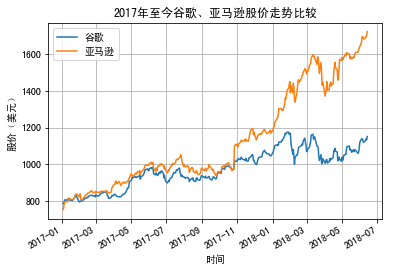

In [26]:
'''
第1组：谷歌、亚马逊
'''
# 绘制谷歌的画纸2
ax2 = googDf.plot(x=googDf.index, y='Close', label='谷歌')
# 通过指定画纸ax，在同一张画纸上绘图
# 亚马逊
amznDf.plot(ax=ax2, x=amznDf.index, y='Close', label='亚马逊')
# x坐标轴文本
plt.xlabel('时间')
# y坐标轴文本
plt.ylabel('股价（美元）')
# 图片标题
plt.title('2017年至今谷歌、亚马逊股价走势比较')
# 显示网格
plt.grid(True)

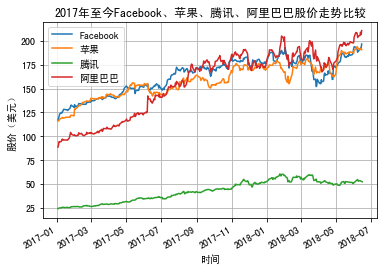

In [29]:
'''
第2组：Facebook、苹果、腾讯、阿里巴巴
'''
# 绘制Facebook的画纸3
# 通过指定画纸ax，在同一张画纸上绘图
# Facebook
ax3 = fbDf.plot(x=fbDf.index, y='Close', label='Facebook')
# 苹果
aaplDf.plot(ax=ax3, x=aaplDf.index, y='Close', label='苹果')
# 腾讯
txDf.plot(ax=ax3, x=txDf.index, y='Close_dollar', label='腾讯')
# 阿里巴巴
babaDf.plot(ax=ax3, x=babaDf.index, y='Close', label='阿里巴巴')
# x坐标轴文本
plt.xlabel('时间')
# y坐标轴文本
plt.ylabel('股价（美元）')
# 图片标题
plt.title('2017年至今Facebook、苹果、腾讯、阿里巴巴股价走势比较')
# 显示网格
plt.grid(True)

## 柱状图：GAFATA股票的平均值

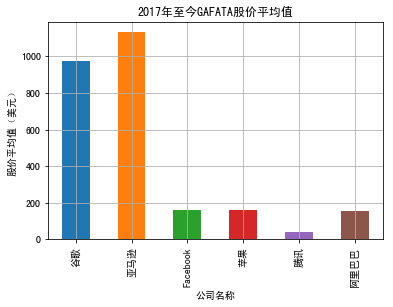

In [30]:
# 6家公司股票收盘价平均值
gafataMeanList = [googDf['Close'].mean(),
                  amznDf['Close'].mean(),
                  fbDf['Close'].mean(),
                  aaplDf['Close'].mean(),
                  txDf['Close_dollar'].mean(),
                  babaDf['Close'].mean()]
# 创建pandas一维数组Series
gafataMeanSer = pd.Series(gafataMeanList,
                          index=['谷歌',
                                 '亚马逊',
                                 'Facebook',
                                 '苹果',
                                 '腾讯',
                                 '阿里巴巴'])
gafataMeanSer.plot(kind='bar', label='GAFATA')
# 图片标题
plt.title('2017年至今GAFATA股价平均值')
# x坐标轴文本
plt.xlabel('公司名称')
# y坐标轴文本
plt.ylabel('股价平均值（美元）')
# 显示网格
plt.grid(True)

**分析结果**：可以看出，仅从股票价格上来判断，亚马逊和谷歌的股票价格要远远的超过了其他四家。但是这里只是算的平均值，下面我们看下用四分位数绘制的箱线图

## 箱线图：GAFATA收盘价变化情况

In [31]:
# 存放6家公司的收盘价
closeDf = pd.DataFrame()
# 合并6家公司的收盘价
closeDf = pd.concat([closeDf,
                     googDf['Close'],
                     amznDf['Close'],
                     fbDf['Close'],
                     aaplDf['Close'],
                     txDf['Close_dollar'],
                     babaDf['Close']
                    ], axis=1)
# 重命名列名为公司名称
closeDf.columns = ['谷歌', '亚马逊', 'Facebook', '苹果', '腾讯', '阿里巴巴']

closeDf.head()

,谷歌,亚马逊,Facebook,苹果,腾讯,阿里巴巴
Date,,,,,,
2017-01-03,786.140015,753.669983,116.860001,116.150002,24.148499,88.599998
2017-01-04,786.900024,757.179993,118.690002,116.019997,24.097500,90.510002
2017-01-05,794.020020,780.450012,120.669998,116.610001,24.645750,94.370003
2017-01-06,806.150024,795.989990,123.410004,117.910004,24.875251,93.889999
2017-01-09,806.650024,796.919983,124.900002,118.989998,24.939001,94.720001


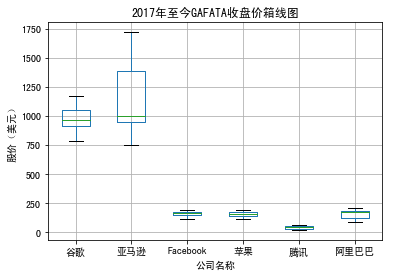

In [35]:
# 箱线图
closeDf.plot(kind='box')
plt.title('2017年至今GAFATA收盘价箱线图')
plt.xlabel('公司名称')
plt.ylabel('股价（美元）')
plt.grid(True)

---

# 获取特定公司股票信息

In [36]:
def stockmap(Companyname):
    import pandas as pd
    from pandas_datareader import data as pdr
    import fix_yahoo_finance as fyf
    import matplotlib.pyplot as plt
    fyf.pdr_override()
    
    start_date = '2018-01-01'
    end_date = '2018-06-15'
    
    companyDict = {'特斯拉':'TSLA','谷歌':'GOOG','亚马逊':'AMZN','Facebook':'FB',
                   '苹果':'AAPL','阿里巴巴':'BABA','腾讯':'0700.hk'}
    
    companyDf = pdr.get_data_yahoo(companyDict[Companyname], start_date, end_date)
    
    companyDf.plot(x=companyDf.index, y='Close')
    plt.title(companyDict[Companyname])
    plt.grid(True)
    plt.show()
    
    return Companyname

请输入一个公司中文名称
特斯拉
[*********************100%***********************]  1 of 1 downloaded


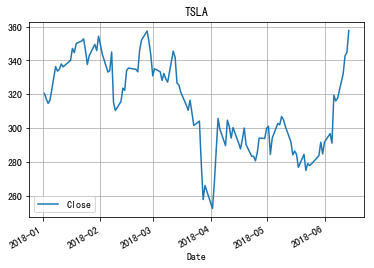

'特斯拉'

In [37]:
# 特斯拉
companyname = input('请输入一个公司中文名称\n')
stockmap(companyname) 